***importing necessary packages***

In [11]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***Path for pre-trained model and sample image***

In [0]:
caffe_model_path = '/content/drive/My Drive/deep-learning-opencv/face-detection/res10_300x300_ssd_iter_140000.caffemodel'
image_path = '/content/drive/My Drive/deep-learning-opencv/face-detection/image/iron_chic.jpg'
deploy_protxt = '/content/drive/My Drive/deep-learning-opencv/face-detection/deploy.prototxt.txt'

***load the input image from drive***

(500, 500, 3)


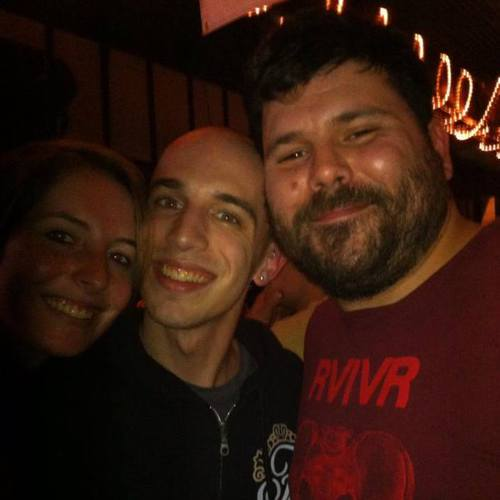

In [13]:
image = cv2.imread(image_path)
(h, w) = image.shape[:2]
print(image.shape)
cv2_imshow(image)

***our CNN requires fixed spatial dimensions for our input image(s) so we need to ensure:***
  1. ***it is resized to (300,300) pixels***
  2. ***while performing mean subtraction (104, 117, 123) to normalize the input***
  3. ***after executing this command our "blob" now has the shape: (1, 3, 300, 300)***

In [14]:
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
blob.shape

(1, 3, 300, 300)

***load our trained model from drive and set the blob as input to the network and perform a forward-pass to obtain our face detection***

In [0]:
net = cv2.dnn.readNetFromCaffe(deploy_protxt, caffe_model_path)
net.setInput(blob)
detections = net.forward()

***loop over the detections***

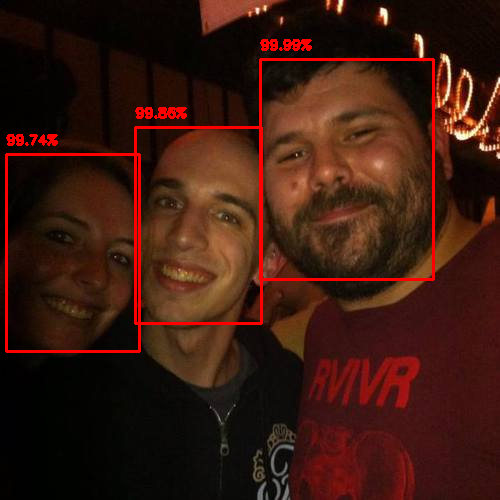

In [16]:
for i in range(0, detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > 0.5:
        # compute the (x, y)-coordinates of the bounding box for the object
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
 
        # draw the bounding box of the face along with the associated probability
        text = "{:.2f}%".format(confidence * 100)
        if startY - 10 > 10:
            y = startY - 10 
        else:
            y = startY + 10
        cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
        cv2.putText(image, text, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
# show the output image
cv2_imshow(image)
 